In [1]:
import sys
import os
sys.path.append("/mnt/brain5/scratch/wcarvalh/projects/rljax/")
print("Started")
print(os.getcwd())

Started
/mnt/brain5/scratch/wcarvalh/projects/rljax/analysis/archive


In [2]:
from IPython.display import display, HTML

from vistools.tensorboard_data import TensorboardData
from vistools.tensorboard_vistools import Vistool, PanelTool


%matplotlib inline
%load_ext autoreload
%autoreload 2

/home/wcarvalh/miniconda3/envs/acmejax/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
basepath="/mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/"

run_data = TensorboardData(
    search_paths=None,
    search_kwargs=dict(
        basepath=basepath,
        njobs=1,
        verbose=1,
    )
)

In [4]:
run_data.load_paths(
    search_paths=[
        # e.g. goto_avoid/settings/seed
        # "respawn_baselines/*usfa*/*",
        "farm_model_search_redo2/*/*",
    ],
    config_file='config.json',
)
run_data.load_settings(config_search='config.json')
run_data.settings_df

get_runs: /mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/farm_model_search_redo2/*/*


/mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/farm_model_search_redo2/*/*: 9


loaded: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 12574.53it/s]


Added: 3
{'final_lr_scale': {1e-05, 0.0},
 'seperate_cumulant_params': {False, True},
 'seperate_model_params': {False, True}}


,seperate_model_params,final_lr_scale,seperate_cumulant_params
0,True,0.00001,False
1,True,0.00000,False
2,False,0.00000,True


,path,fullpath,experiment_settings,experiment_settings_seed,concat_w,normalize_cumulants,prefetch_size,vision_torso,num_parallel_calls,duelling,...,out_layers,seed,aggregation,z_as_train_task,q_aux_anneal,extra_negatives,store_lstm_state,target_update_period,lambda_,image_attn
0,"farm_model_search_redo2/agent=usfa_farm_model,...",/mnt/brain5/scratch/wcarvalh/projects/rljax/re...,"farm_model_search_redo2,agent=usfa_farm_model,...","farm_model_search_redo2,agent=usfa_farm_model,...",False,False,0,atari,1,False,...,0,1,concat,False,10000,4,True,2500,0.9,True
1,"farm_model_search_redo2/agent=usfa_farm_model,...",/mnt/brain5/scratch/wcarvalh/projects/rljax/re...,"farm_model_search_redo2,agent=usfa_farm_model,...","farm_model_search_redo2,agent=usfa_farm_model,...",False,False,0,atari,1,False,...,0,1,concat,False,10000,4,True,2500,0.9,True
2,"farm_model_search_redo2/agent=usfa_farm_model,...",/mnt/brain5/scratch/wcarvalh/projects/rljax/re...,"farm_model_search_redo2,agent=usfa_farm_model,...","farm_model_search_redo2,agent=usfa_farm_model,...",False,False,0,atari,1,False,...,0,1,concat,False,10000,4,True,2500,0.9,True


In [5]:
run_data.load_tensorboard(
    njobs=8,
    key_filter=lambda k: 'steps' in k.lower() or 'EpisodeReturn' in k,
    load_paths=True,
)

get_runs: /mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/farm_model_search_redo2/*/*


/mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/farm_model_search_redo2/*/*: 9


loaded: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 83886.08it/s]


Added: 0


settings: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:14<00:00,  4.83s/it]

Keys:
['usfa/ActorSteps',
 'usfa/LearnerSteps',
 'usfa/EvaluatorSteps',
 'usfa/StepsPerSecond',
 'actor/0.Task/0,0,0,1/EpisodeReturn',
 'actor/StepsPerSecond',
 'actor/EpisodeReturn',
 'actor/0.Task/0,0,1,0/EpisodeReturn',
 'actor/EvaluatorSteps',
 'actor/0.Task/0,1,0,0/EpisodeReturn',
 'actor/LearnerSteps',
 'actor/0.Task/1,0,0,0/EpisodeReturn',
 'evaluator/0.Task/1,1,0,0/EpisodeReturn',
 'evaluator/EpisodeReturn',
 'evaluator/ActorSteps',
 'evaluator/StepsPerSecond',
 'evaluator/0.Task/1,1,1,1/EpisodeReturn',
 'evaluator/0.Task/0,0,1,0/EpisodeReturn',
 'evaluator/0.Task/-1,1,0,1/EpisodeReturn',
 'evaluator/0.Task/0,1,0,0/EpisodeReturn',
 'evaluator/0.Task/-1,1,-1,1/EpisodeReturn',
 'evaluator/LearnerSteps',
 'evaluator/0.Task/0,0,0,1/EpisodeReturn',
 'evaluator/0.Task/1,0,0,0/EpisodeReturn']


In [6]:
key_with_legend = '1,1,0,0'
filter_key =  '-1,1,-1,1'

vis_tool = Vistool(
    tensorboard_data=run_data,
    key_with_legend=f'evaluator/0.Task/{key_with_legend}/EpisodeReturn',
    filter_key=f'evaluator/0.Task/{filter_key}/EpisodeReturn',
    filter_column='mean',
    # plot_data_kwargs=dict(xlabel_key=steps_key),
    plot_settings=
    [
        dict(
            key=f'evaluator/0.Task/{key}/EpisodeReturn',
            title=f"{key} (train)",
            ylabel="Success Rate",
            xlabel='Frames') 
        for key in ['1,0,0,0', '0,1,0,0', '0,0,1,0', '0,0,0,1']
    ] +
    [
        dict(
            key=f'evaluator/0.Task/{key}/EpisodeReturn',
            title=f"{key} (eval)",
            ylabel="Success Rate",
            xlabel='Frames') 
        for key in ['1,1,0,0', '1,1,1,1', '-1,1,0,1', '-1,1,-1,1']
        # for key in ['1,1,1,1','-1,1,-1,1']
    ],
)

# Unsupervised FARM + Model pairs

No Matches for {'agent': 'usfa_farm_model', 'schedule_end': 300000.0, 'seperate_cumulant_params': True}


,num_seeds,agent
0,1,usfa_farm_model
1,3,usfa_farm_model
2,3,usfa_farm_model


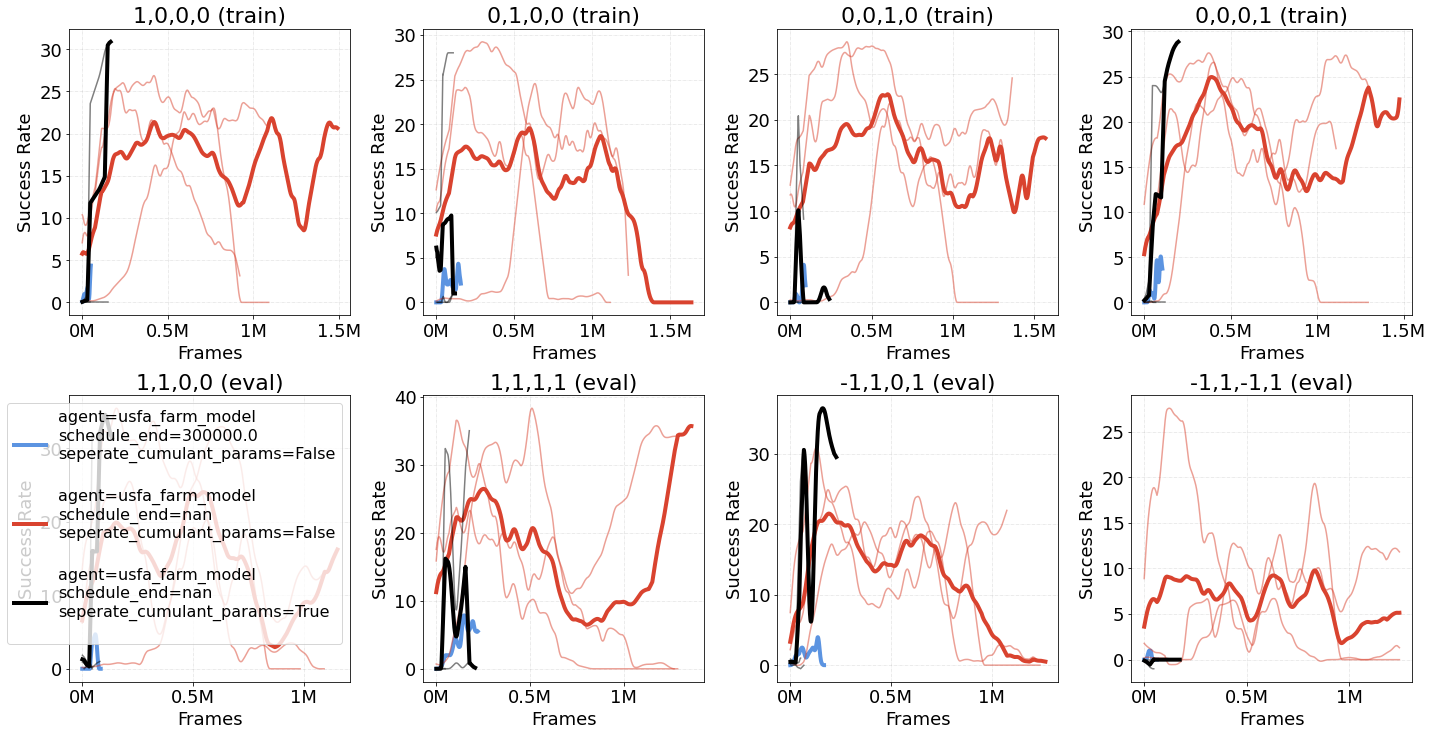

In [11]:
vis_tool.plot_filters(
    topk=1,
    # legend_kwargs="right",
    verbosity=1,
    maxcols=4,
    data_filters=[
        # dict(
        #     settings=dict(
        #         agent='usfa',
        #     ),
        # ),
        dict(
            settings=dict(
                agent='usfa_farm_model',
                # seperate_value_params=None,
                schedule_end=None,
                seperate_cumulant_params=None,
            ),
        ),
    ],
    display_settings=['agent'],
    # legend_kwargs=dict(
    #             loc='lower left',
    #             bbox_to_anchor=(0,-.75), 
    #             ncol=8,
    #             ),
    # fig_kwargs=dict(legend_text_size=20),
    plot_data_kwargs=dict(
        xlabel_key='evaluator/ActorSteps',
        xmax=2e6,
        n_samples=1000,
        rolling=100,
        std_alpha=.1,
        runs_alpha=.5,
        err_fn=lambda h: h.grouped.sem(),
        err_style='runs'),
    subplot_kwargs=dict(unit=5),
)

# Takeaway
- Unsupervised USFA doesn't do that well
- just replacing LSTM w/ FARM dramatically improves performance